# **Business Case: Delhivery - Feature Engineering**

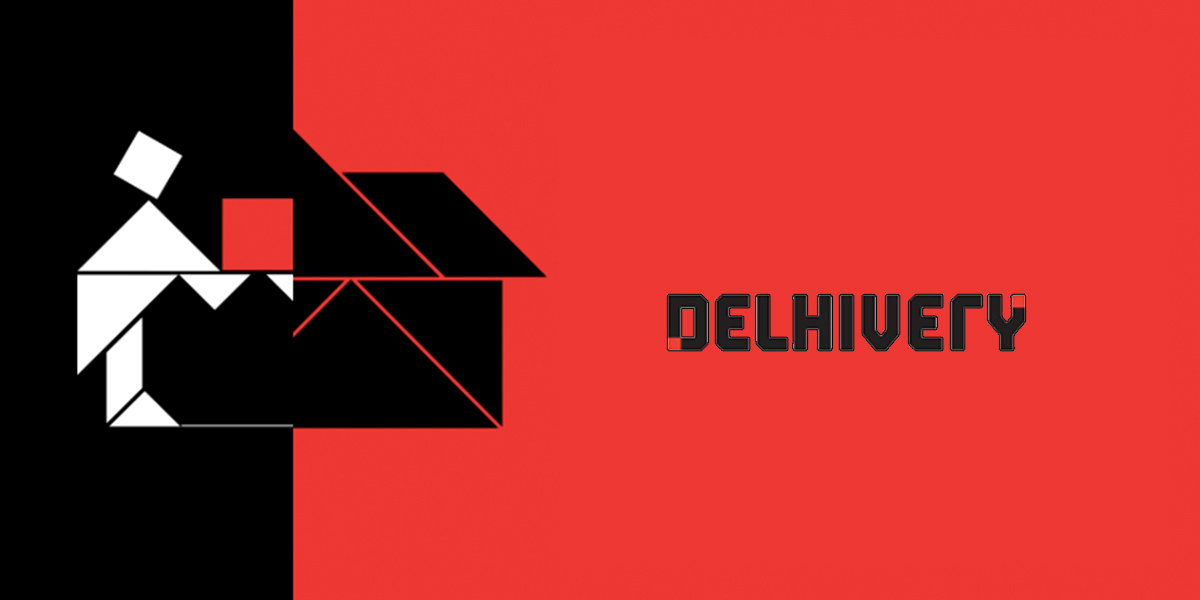

##**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

##**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting - Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind,levene,shapiro,kruskal

In [602]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181" -O "delhivery.csv"

--2024-09-19 12:12:59--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.159.36, 13.35.159.92, 13.35.159.184, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.159.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M  26.0MB/s    in 2.0s    

2024-09-19 12:13:01 (26.0 MB/s) - ‘delhivery.csv’ saved [55617130/55617130]



In [603]:
data = pd.read_csv("delhivery.csv")     # loading dataset

In [604]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [605]:
data.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,False,70,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [607]:
data.describe(include = ("all")).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**🔍Insights :**
- Trip Creation and UUID Analysis: The most frequent trip has a specific timestamp (2018-09-28 05:23:15.359220) and unique trip ID (trip-153811219535896559), appearing 101 times, indicating recurrent activities or routes.
- Route Type Dominance: The majority of trips (69%) are of type FTL, showing a preference for Full Truckload (FTL) over other types, which can influence fleet management strategies.
- Distance Comparison: 'actual_distance_to_destination' (mean 234 km) is higher than 'osrm_distance' (mean 284 km), indicating that trips often exceed planned distances, which may impact fuel and time efficiency.
- Time Delays: 'segment_actual_time' (mean of 36 mins) is consistently longer than 'segment_osrm_time' (mean of 18.5 mins), pointing to frequent delays in reaching intermediate destinations.
- Demand in Specific Source-Destination Routes: The top source and destination, "IND000000ACB" and "Gurgaon_Bilaspur_HB (Haryana)", appear frequently, suggesting heavy demand in this route, which could be critical for optimizing logistics.
- High Variability in Segment Distance: The 'segment_osrm_distance' shows a wide range (0 to 2191 km), with a mean of 22.8 km, indicating trips that can vary significantly in length, impacting planning and resource allocation.

In [608]:
for i in data.columns:
  print(f"Unique Values of {i} : {data[i].nunique()}")

Unique Values of data : 2
Unique Values of trip_creation_time : 14817
Unique Values of route_schedule_uuid : 1504
Unique Values of route_type : 2
Unique Values of trip_uuid : 14817
Unique Values of source_center : 1508
Unique Values of source_name : 1498
Unique Values of destination_center : 1481
Unique Values of destination_name : 1468
Unique Values of od_start_time : 26369
Unique Values of od_end_time : 26369
Unique Values of start_scan_to_end_scan : 1915
Unique Values of is_cutoff : 2
Unique Values of cutoff_factor : 501
Unique Values of cutoff_timestamp : 93180
Unique Values of actual_distance_to_destination : 144515
Unique Values of actual_time : 3182
Unique Values of osrm_time : 1531
Unique Values of osrm_distance : 138046
Unique Values of factor : 45641
Unique Values of segment_actual_time : 747
Unique Values of segment_osrm_time : 214
Unique Values of segment_osrm_distance : 113799
Unique Values of segment_factor : 5675


#Checking Null Values

In [609]:
for i in data.columns:
  print(f"Percentage of Null Values in {i}  : {round((data[i].isnull().sum() / len(data))*100,2)}")

Percentage of Null Values in data  : 0.0
Percentage of Null Values in trip_creation_time  : 0.0
Percentage of Null Values in route_schedule_uuid  : 0.0
Percentage of Null Values in route_type  : 0.0
Percentage of Null Values in trip_uuid  : 0.0
Percentage of Null Values in source_center  : 0.0
Percentage of Null Values in source_name  : 0.2
Percentage of Null Values in destination_center  : 0.0
Percentage of Null Values in destination_name  : 0.18
Percentage of Null Values in od_start_time  : 0.0
Percentage of Null Values in od_end_time  : 0.0
Percentage of Null Values in start_scan_to_end_scan  : 0.0
Percentage of Null Values in is_cutoff  : 0.0
Percentage of Null Values in cutoff_factor  : 0.0
Percentage of Null Values in cutoff_timestamp  : 0.0
Percentage of Null Values in actual_distance_to_destination  : 0.0
Percentage of Null Values in actual_time  : 0.0
Percentage of Null Values in osrm_time  : 0.0
Percentage of Null Values in osrm_distance  : 0.0
Percentage of Null Values in fa

**🔍Insights :**

Since less than 0.5% of the values are missing in the "destination_name" and "source_name" columns, it's more efficient to drop the rows with missing data.

In [610]:
data.dropna(inplace = True)

In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

#Checking Duplicates

In [612]:
data.duplicated().sum()

0

**🔍Insights :**

No Duplicate values are present in the dataset.


#**Converting required columns to Datetime**

In [613]:
pd.set_option('display.max_columns',40)
data.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [614]:
data["od_start_time"] = pd.to_datetime(data["od_start_time"])
data["od_end_time"] = pd.to_datetime(data["od_end_time"])
data["trip_creation_time"] = pd.to_datetime(data["trip_creation_time"])

##Droping Unknown Columns

In [615]:
data = data.drop(columns = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"])

In [616]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

##Since delivery details of one package are divided into several rows we can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their 1. Trip_uuid, Source ID and Destination ID.


**Making Segment Key Based on Trip_uuid, Source ID and Destination ID**

In [617]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [618]:
data["segment_key"] = data["trip_uuid"] + "-" + data["source_center"] + "-" + data["destination_center"]

col = ["segment_actual_time", "segment_osrm_time", "segment_osrm_distance"]


In [619]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'source_center' : 'first',
  'destination_name': 'last',
  'destination_center' : 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum'
}

In [620]:
# Aggregating at segment level / every breakpoint level.

segment_data = data.groupby("segment_key").agg(segment_dict).reset_index()
segment_data = segment_data.sort_values(by=["segment_key","od_end_time"], ascending=True).reset_index(drop = True)

In [621]:
segment_data.head(3)

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748-IND209304AAA-IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748-IND462022AAA-IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164-IND561203AAB-IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995


In [622]:
segment_data = segment_data.rename(columns = {"segment_osrm_distance":"segment_osrm_distance_sum",
                                    "segment_osrm_time" : "segment_osrm_time_sum",
                                   "segment_actual_time" : "segment_actual_time_sum"}) # Renaming columns

In [623]:
segment_data.head(3)

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748-IND209304AAA-IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748-IND462022AAA-IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164-IND561203AAB-IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995


**🔍Insights :**

Now data is at segment level.

In [624]:
segment_data["trip_uuid"].value_counts()

,count
trip_uuid,
trip-153717306559016761,8
trip-153710494321650505,8
trip-153758895506669465,8
trip-153801215317324804,7
trip-153723403393244965,7
...,...
trip-153709428734920326,1
trip-153772871464594138,1
trip-153709414287625422,1


#Feature Engineering
##Calculate the time taken between od_start_time and od_end_time

In [625]:
segment_data["od_timetotal_hour"] = (segment_data["od_end_time"]-segment_data["od_start_time"]).dt.total_seconds()/3600

In [626]:
segment_data["od_timetotal_hour"]

,od_timetotal_hour
0,21.010074
1,16.658423
2,0.980540
3,2.046325
4,13.910649
...,...
26217,1.035253
26218,1.518130
26219,0.736240
26220,4.791233


#Further aggregate on the basis of just Trip_uuid.

In [627]:
# Making the data at trip level

trip_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_timetotal_hour':'sum',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum'

}

In [628]:
trip_data = segment_data.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)

In [629]:
trip_data["trip_uuid"].value_counts()

,count
trip_uuid,
trip-153671041653548748,1
trip-153791166614583191,1
trip-153791188846803726,1
trip-153791199511952768,1
trip-153791203866379915,1
...,...
trip-153730334220215546,1
trip-153730343361346090,1
trip-153730345417711989,1


##Trip level data

In [630]:
trip_data.sample(3)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5630,training,2018-09-19 20:23:34.534054,Carting,trip-153738861453372983,IND411036AAA,Pune_Mundhawa_L (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),6.241682,374.0,21.745825,56.0,28.0,29.9373,55.0,27.0,30.2363
9005,training,2018-09-24 18:27:59.801266,Carting,trip-153781367980088422,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND700028AAB,CCU_DumDum_DPC (West Bengal),1.528773,91.0,15.713034,57.0,19.0,18.8561,57.0,18.0,18.8561
6844,training,2018-09-21 14:18:26.057331,Carting,trip-153753950605706982,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND400015AAA,Mumbai_CottonGreen_DPC (Maharashtra),3.437292,206.0,36.922209,126.0,33.0,43.3669,125.0,30.0,43.3927


# Destination Name: Split and extract features out of destination. City-place-code (State)

In [631]:
# Extracting city name


def city (val):
  i =  val.split("(")[0]
  if i.count(" ") >3:
    # print(i.split(" ")[0])
    return i.split(" ",maxsplit=1)[0]
  elif i.count(" ") >2:
    # print(i.split(" ")[0])
    return i.split(" ",maxsplit=1)[0]
  else:
    return i.split("_")[0]

# Extracting place name

def place (val):
  i =  val.split("(")[0]
  if i.count(" ") >3:
    # print(i.split(" ")[0])
    return i.split(" ",maxsplit=1)[1]
  elif i.count(" ") >2:
    # print(i.split(" ")[0])
    return i.split(" ",maxsplit=1)[1]
  elif i.count("_") >=1:
    return i.split("_")[1]
  else:
    return i.split(" ")[1]

# Extracting  code

def source_code(val):
  i =  val.split("(")[0]
  if i.count("_") >=2:
    return i.split("_")[-1]

  else:
    return "Unknown Code"

In [632]:
trip_data["destination_state"] = trip_data["destination_name"].str.split("(").str[1].str[:-1] # Extracting State name
trip_data["destination_city"] = trip_data["destination_name"].apply(lambda x : city(x))
trip_data["destination_place"] = trip_data["destination_name"].apply(lambda x : place(x))
trip_data["destination_code"] = trip_data["destination_name"].apply(lambda x : source_code(x))

In [633]:
trip_data[["destination_city","destination_state","destination_code","destination_place"]]

,destination_city,destination_state,destination_code,destination_place
0,Kanpur,Uttar Pradesh,6,Central
1,Doddablpur,Karnataka,D,ChikaDPP
2,Gurgaon,Haryana,HB,Bilaspur
3,Mumbai,Maharashtra,IP,MiraRd
4,Sandur,Karnataka,D,WrdN1DPP
...,...,...,...,...
14782,Chandigarh,Punjab,H,Mehmdpur
14783,Faridabad,Haryana,DC,Blbgarh
14784,Kanpur,Uttar Pradesh,DC,GovndNgr
14785,Tirchchndr,Tamil Nadu,D,Shnmgprm


# Source Name: Split and extract features out of Source. City-place-code (State)

In [634]:
trip_data["source_city"] = trip_data["source_name"].apply(lambda x : city(x))
trip_data["source_place"] = trip_data["source_name"].apply(lambda x : place(x))
trip_data["source_code"] = trip_data["source_name"].apply(lambda x : source_code(x))
trip_data["source_state"] = trip_data["source_name"].str.split("(").str[1].str[:-1] # Extracting State name

In [635]:
trip_data[["source_city","source_state","source_code","source_place"]]

,source_city,source_state,source_code,source_place
0,Kanpur,Uttar Pradesh,6,Central
1,Doddablpur,Karnataka,D,ChikaDPP
2,Gurgaon,Haryana,HB,Bilaspur
3,Mumbai Hub,Maharashtra,Unknown Code,Hub
4,Bellary,Karnataka,Unknown Code,Dc
...,...,...,...,...
14782,Chandigarh,Punjab,H,Mehmdpur
14783,FBD,Haryana,DPC,Balabhgarh
14784,Kanpur,Uttar Pradesh,DC,GovndNgr
14785,Tirunelveli,Tamil Nadu,I,VdkkuSrt


In [636]:
trip_data.isnull().sum() # Null check

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_timetotal_hour,0
start_scan_to_end_scan,0


## Trip_creation_time: Extract features like month, year and day,Week of year , week day , day name

In [637]:
trip_data['trip_year'] = trip_data['trip_creation_time'].dt.year
trip_data['trip_month'] = trip_data['trip_creation_time'].dt.month
trip_data['trip_hour'] = trip_data['trip_creation_time'].dt.hour
trip_data['trip_day'] = trip_data['trip_creation_time'].dt.day
trip_data['trip_weekofyear'] = trip_data['trip_creation_time'].dt.isocalendar().week
trip_data['trip_weekday'] = trip_data['trip_creation_time'].dt.weekday
trip_data["trip_day_name"] = trip_data["trip_creation_time"].dt.day_name()

In [638]:
trip_data[['trip_year','trip_month','trip_hour','trip_day','trip_weekofyear','trip_weekday','trip_day_name']].head(3)

,trip_year,trip_month,trip_hour,trip_day,trip_weekofyear,trip_weekday,trip_day_name
0,2018,9,0,12,37,2,Wednesday
1,2018,9,0,12,37,2,Wednesday
2,2018,9,0,12,37,2,Wednesday


In [639]:
# Dropping Unwanted Columns

trip_data = trip_data.drop(columns = ["source_name","destination_name"])

In [640]:
trip_data.shape

(14787, 30)

In [641]:
trip_data.head(3)

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_city,source_place,source_code,source_state,trip_year,trip_month,trip_hour,trip_day,trip_weekofyear,trip_weekday,trip_day_name
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,IND209304AAA,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central,6,Kanpur,Central,6,Uttar Pradesh,2018,9,0,12,37,2,Wednesday
1,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,IND561203AAB,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur,ChikaDPP,D,Karnataka,2018,9,0,12,37,2,Wednesday
2,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND000000ACB,IND000000ACB,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur,HB,Gurgaon,Bilaspur,HB,Haryana,2018,9,0,12,37,2,Wednesday


#**Analysis Of Trip Level Data**

In [642]:
trip_data.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
od_timetotal_hour,14787.0,8.840187,0.391024,2.494975,4.661846,10.558962,131.642533,10.97888
start_scan_to_end_scan,14787.0,529.429025,23.0,149.0,279.0,632.0,7898.0,658.254936
actual_distance_to_destination,14787.0,164.090196,9.002461,22.777099,48.287894,163.591258,2186.531787,305.502982
actual_time,14787.0,356.306012,9.0,67.0,148.0,367.0,6265.0,561.517936
osrm_time,14787.0,160.990938,6.0,29.0,60.0,168.0,2032.0,271.459495
osrm_distance,14787.0,203.887411,9.0729,30.7569,65.3028,206.6442,2840.081,370.565564
segment_actual_time_sum,14787.0,353.059174,9.0,66.0,147.0,364.0,6230.0,556.365911
segment_osrm_time_sum,14787.0,180.511598,6.0,30.0,65.0,184.0,2564.0,314.679279
segment_osrm_distance_sum,14787.0,222.705466,9.0729,32.57885,69.7842,216.5606,3523.6324,416.846279


In [643]:
num_col = ["od_timetotal_hour","start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance",
           "segment_actual_time_sum","segment_osrm_time_sum","segment_osrm_distance_sum"]

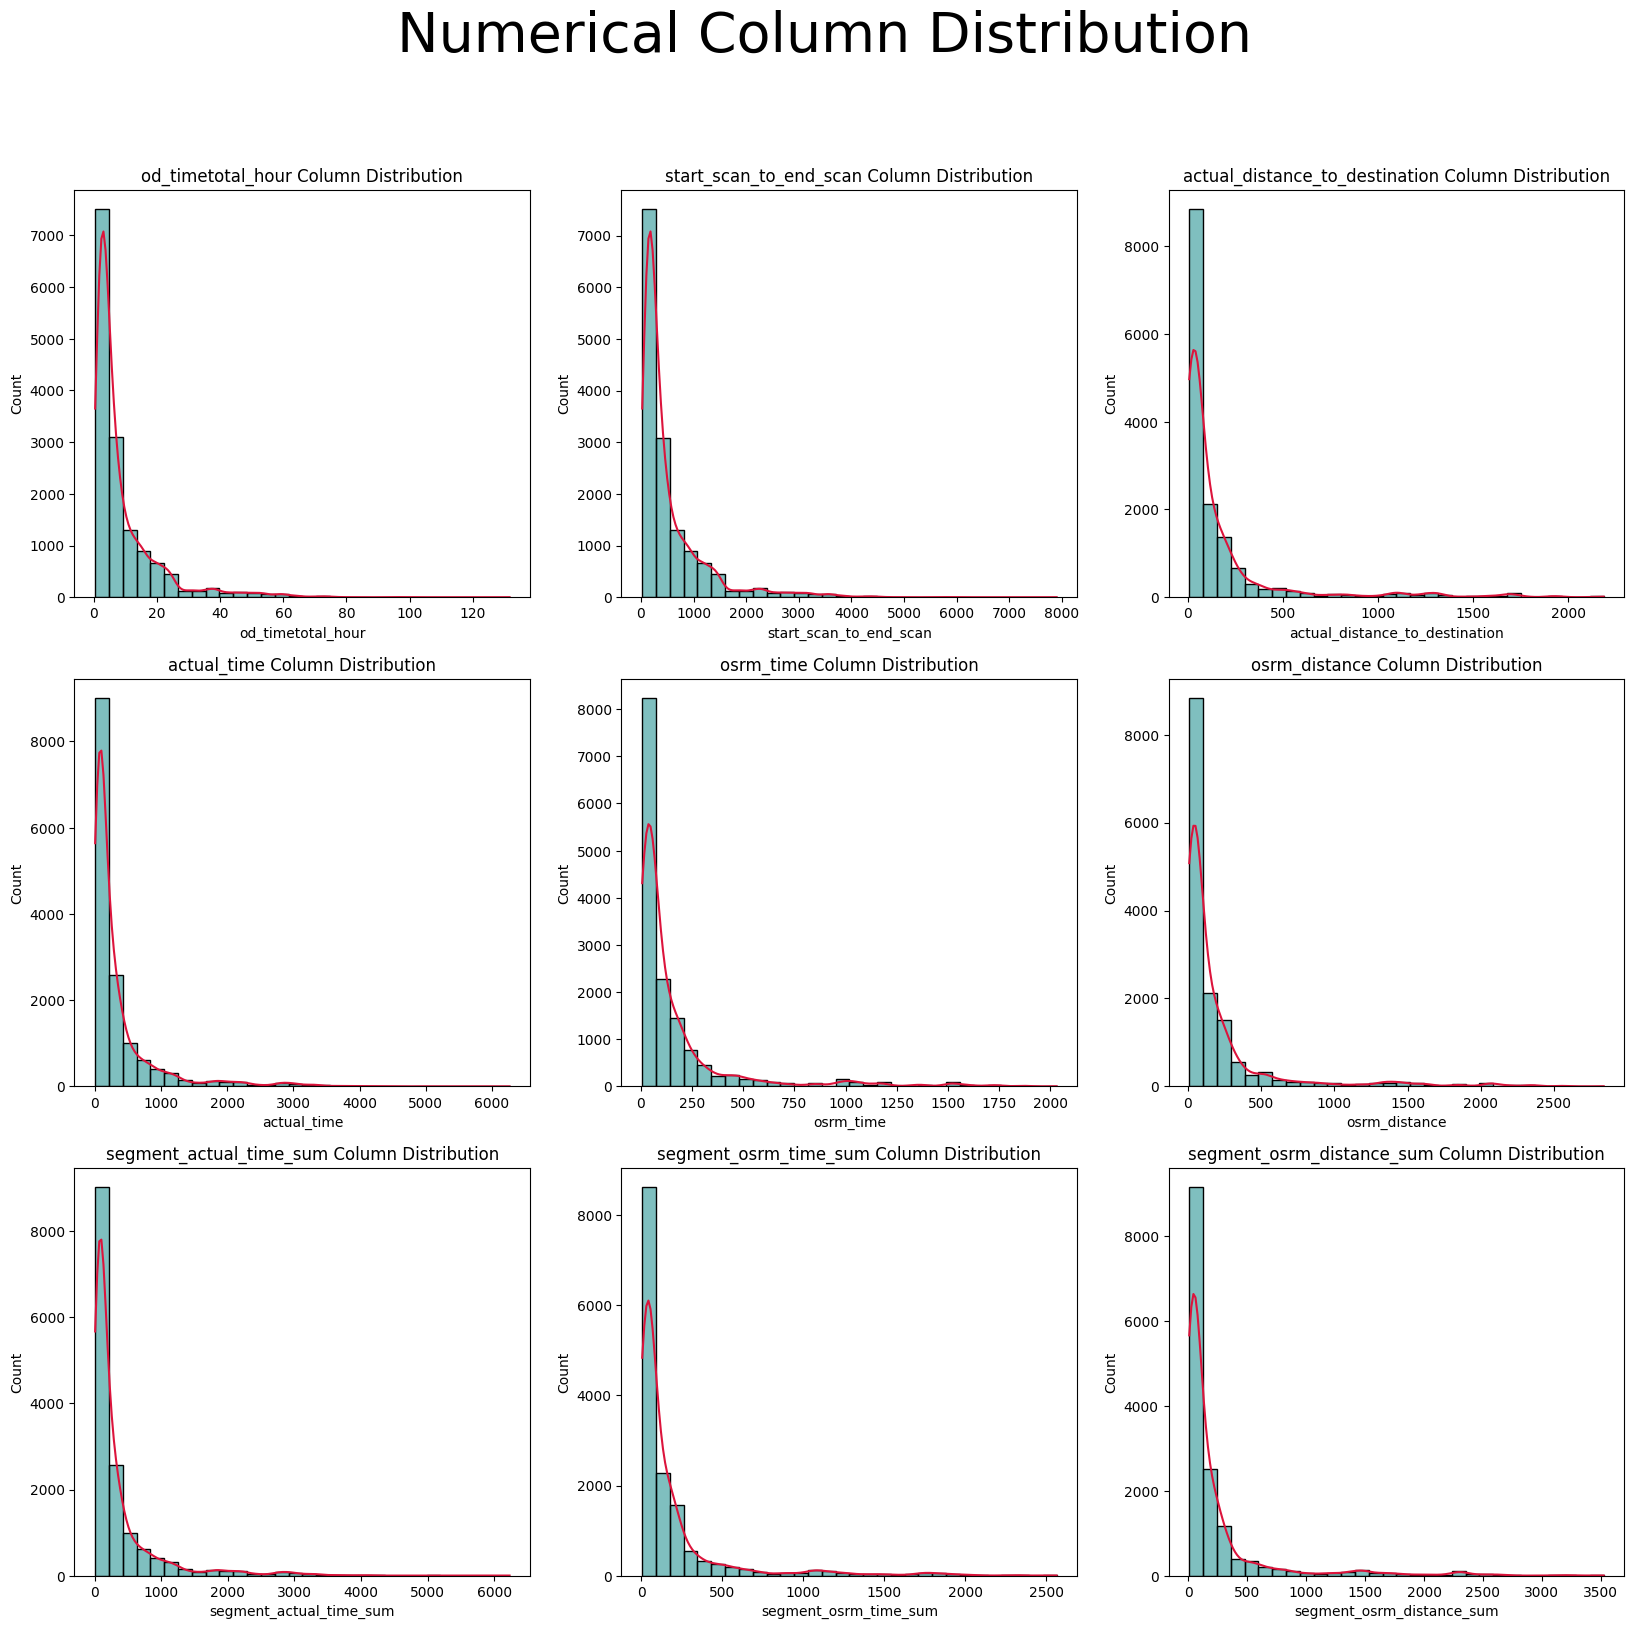

In [644]:
plt.figure(figsize=(20,18))
for i,j in enumerate(num_col):
  i = i+1
  plt.subplot(3,3,i)
  sns.histplot(trip_data[j],bins = 30 ,kde = True,color = "teal" ).lines[0].set_color("crimson")
  plt.title(f"{j} Column Distribution")
plt.suptitle("Numerical Column Distribution" , fontsize = 40)
plt.show()


**Insights 🧐**
- od_timetotal_hour: The average total trip time is around 8.84 hours, but with high variability, as some trips can last over 131 hours.
- start_scan_to_end_scan: The median scan time is 279 minutes, but the data shows significant variability, with some trips taking up to 7898 minutes from start to end scan.
- actual_distance_to_destination: The average trip covers 164 km, with a maximum distance of over 2186 km, indicating trips of varying lengths.
- actual_time: The median trip time is 148 minutes, while the longest trips take over 6265 minutes (over 4 days).
- osrm_time: Planned trip times ('osrm_time') are generally lower than actual times, with a median planned time of 60 minutes.
- osrm_distance: The median planned distance is 65 km, but some planned routes span up to 2840 km.
- segment_actual_time_sum: Total segment time closely mirrors actual trip times, suggesting most delays occur over the entire route.
- segment_osrm_time_sum: Planned segment times are generally shorter, with a median of 65 minutes, reflecting underestimation of actual trip duration.
- segment_osrm_distance_sum: The planned segment distance has a median of 69.8 km, with a maximum of over 3523 km, showing variability in trip segments.

In [645]:
trip_data.describe(include="object").T

,count,unique,top,freq
data,14787,2,training,10645
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
destination_center,14787,1035,IND000000ACB,821
destination_state,14787,31,Maharashtra,2561
destination_city,14787,853,Bengaluru,1088
destination_place,14787,808,Bilaspur,864
destination_code,14787,34,D,2883
source_city,14787,728,Gurgaon,1128


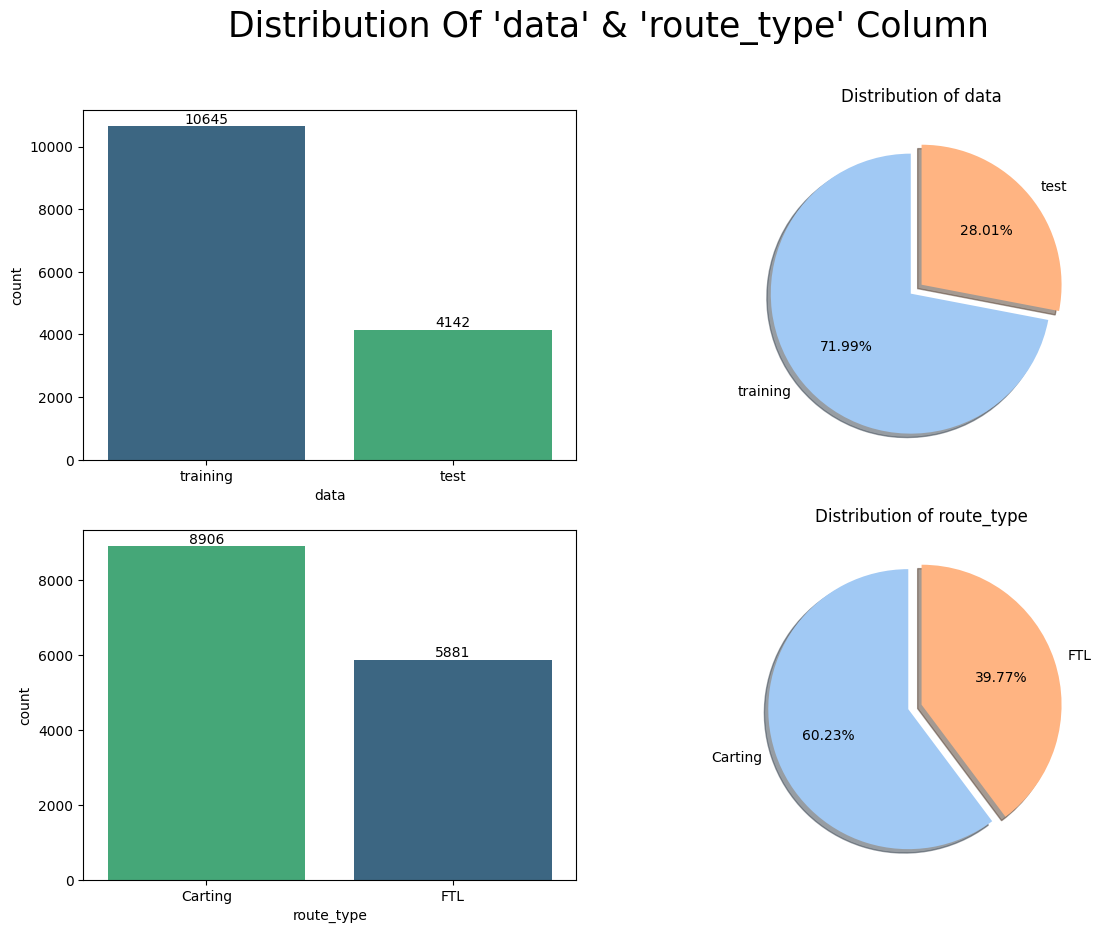

In [646]:
col = ["data","route_type"]
counter = 1
plt.figure(figsize = (14,10))
for i , j in enumerate(col):
  i = i+counter
  plt.subplot(2,2,i)
  bar = sns.countplot(x = j,data = trip_data,hue = j,legend = False,order = trip_data[j].value_counts().index,
                      palette = "viridis")
  for k in bar.containers:
    bar.bar_label(k)
  plt.subplot(2,2,i+1)
  plt.pie(trip_data[j].value_counts(),labels =trip_data[j].value_counts().index, autopct = "%.2f%%",explode = [0.1,0],
          shadow = True,startangle = 90,colors = sns.color_palette("pastel") )
  plt.title(f"Distribution of {j}")
  counter = counter + 1
plt.suptitle("Distribution Of 'data' & 'route_type' Column" , fontsize = 25)
plt.show()

**🔍 Insights**
- The dataset contains 10,645 entries for training and 4,142 entries for testing.
- Carting is the most common route type, appearing 8,906 times, suggesting it is a popular choice among users.

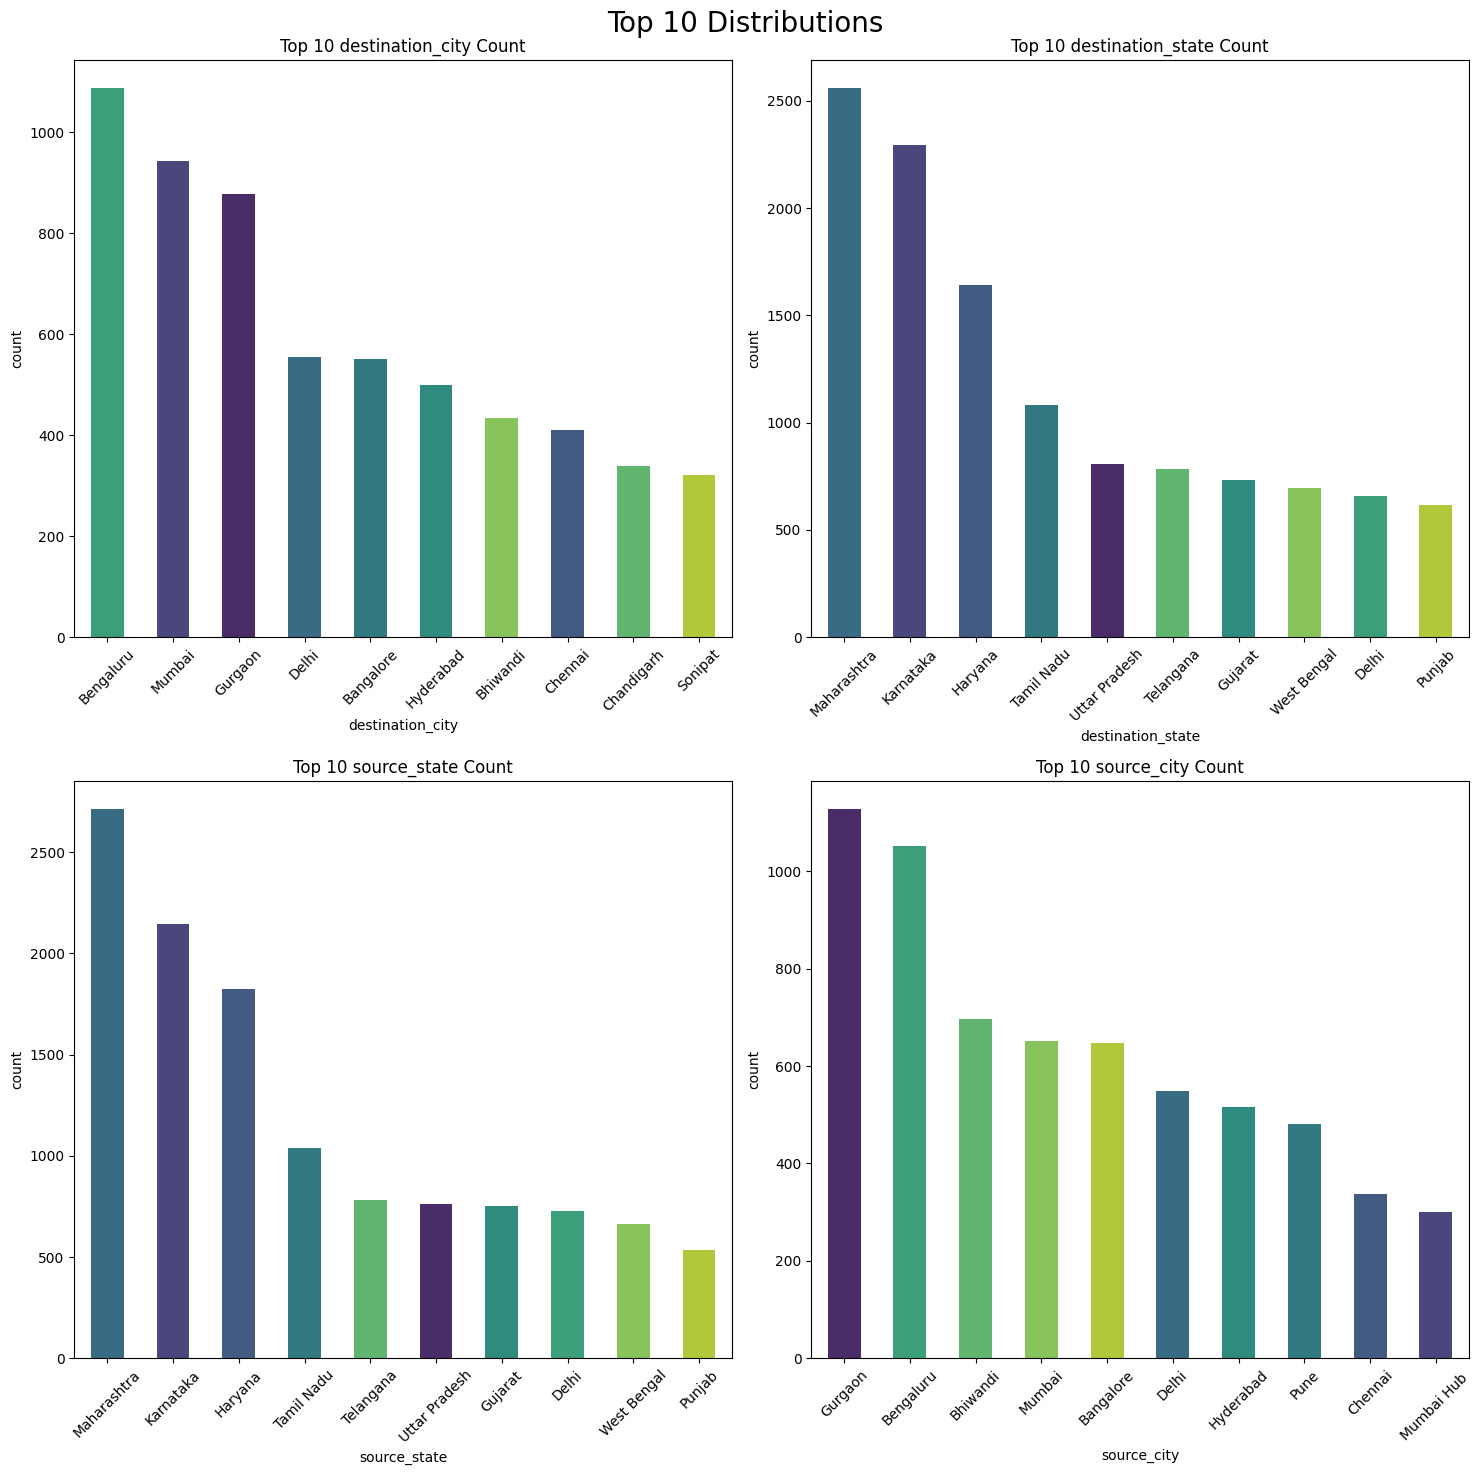

In [647]:
col2 = ["destination_city","destination_state","source_state","source_city"]

plt.figure(figsize=(15,15))
for i,j in enumerate(col2):
  i = i+1
  plt.subplot(2,2,i)
  data = trip_data[trip_data[j].isin(trip_data[j].value_counts().head(10).index)]
  sns.countplot(x = j,data = data,hue = j,legend = False,order = data[j].value_counts().index,
                      palette = "viridis",width = 0.5)
  plt.title(f"Top 10 {j} Count")
  plt.xticks(rotation = 45)
plt.suptitle("Top 10 Distributions" , fontsize = 20)
plt.tight_layout()
plt.show()


**Insights 🔍**
- Bengaluru is the top destination city, followed closely by Mumbai and Gurgaon.
- Maharashtra and Karnataka dominate both the source and destination states, with Maharashtra leading.
- Gurgaon is the most frequent source city, surpassing Bengaluru and Bhubaneswar.
- Haryana is a major contributor to destination states, while Tamil Nadu shows strong activity on both the source and destination sides.

#**Outlier Detection And Handling**

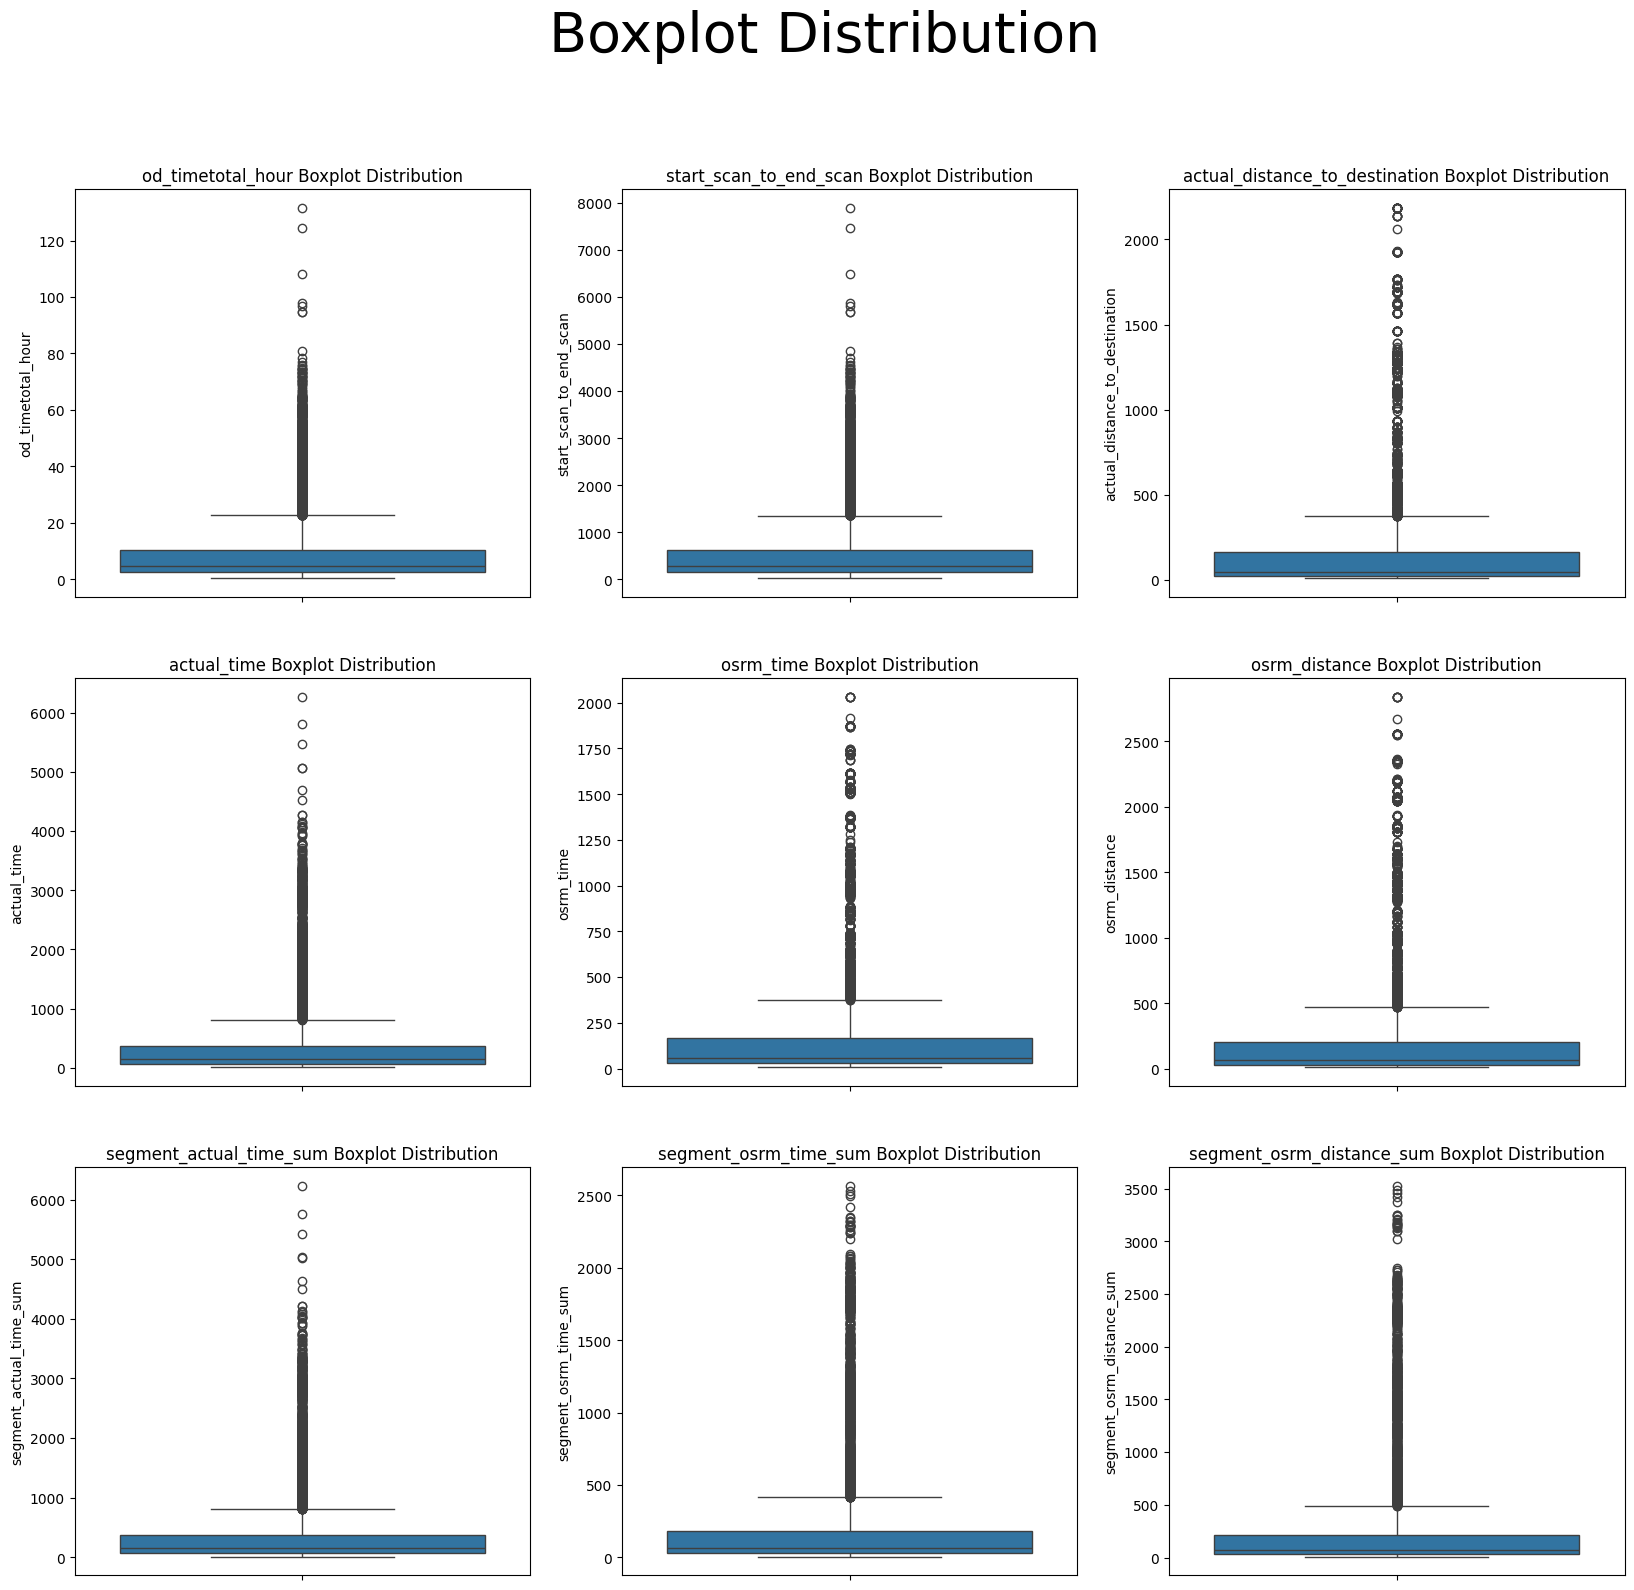

In [648]:
plt.figure(figsize=(20,18))
for i,j in enumerate(num_col):
  i = i+1
  plt.subplot(3,3,i)
  sns.boxplot(y =  trip_data[j])
  plt.title(f"{j} Boxplot Distribution")
plt.suptitle("Boxplot Distribution" , fontsize = 40)
plt.show()

In [649]:
trip_data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
od_timetotal_hour,14787.0,8.840187,10.978880,0.391024,2.494975,4.661846,10.558962,131.642533
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time_sum,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time_sum,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance_sum,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


In [650]:
for i in num_col:
  Q1 = np.quantile(trip_data[i],0.25)
  Q3 = np.quantile(trip_data[i],0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + (1.5*IQR)
  lower_bound = Q1 - (1.5*IQR)
  outliers = trip_data[(trip_data[i]< lower_bound)| (trip_data[i]>upper_bound)]
  print('Column Name :', i)
  print(f'25th Percentile Value : {Q1} , 75th Percentile Value : {Q3} ')
  print(f'IQR Value : {IQR}')
  print(f'Lower Bound : {lower_bound} , Upper Bound : {upper_bound}')
  print(f"Number of Outliers : {len(outliers)}")
  print(f"Percentage Of Outliers : {(len(outliers)/len(trip_data[i]))*100} \n")




Column Name : od_timetotal_hour
25th Percentile Value : 2.494974930972222 , 75th Percentile Value : 10.558961618055555 
IQR Value : 8.063986687083332
Lower Bound : -9.601005099652777 , Upper Bound : 22.654941648680555
Number of Outliers : 1275
Percentage Of Outliers : 8.622438628525057 

Column Name : start_scan_to_end_scan
25th Percentile Value : 149.0 , 75th Percentile Value : 632.0 
IQR Value : 483.0
Lower Bound : -575.5 , Upper Bound : 1356.5
Number of Outliers : 1282
Percentage Of Outliers : 8.669777507269899 

Column Name : actual_distance_to_destination
25th Percentile Value : 22.777098943155323 , 75th Percentile Value : 163.5912581579725 
IQR Value : 140.81415921481718
Lower Bound : -188.44413987907043 , Upper Bound : 374.81249698019826
Number of Outliers : 1452
Percentage Of Outliers : 9.81943599107324 

Column Name : actual_time
25th Percentile Value : 67.0 , 75th Percentile Value : 367.0 
IQR Value : 300.0
Lower Bound : -383.0 , Upper Bound : 817.0
Number of Outliers : 1646


**Insights 🔍**

- On average, about 10% of the data consists of outliers across various columns. Given this percentage and the nature of the data, these outliers likely represent important variations rather than anomalies.


- Instead of removing these outliers, we will retain them for further analysis, as they could provide valuable insights, especially in understanding extremes or unique cases in the dataset.

#**Hypothesis Testing & Visual Analysis**

## 1. Time Comparision Between "od_timetotal_hour" & "start_scan_to_end_scan"

In [651]:
# start_scan_to_end_scan column is currently in minutes , need to convert that into hours.

trip_data["start_scan_to_end_scan_hours"] = trip_data["start_scan_to_end_scan"]/60

trip_data["start_scan_to_end_scan_hours"].head()

,start_scan_to_end_scan_hours
0,37.650000
1,3.000000
2,65.550000
3,1.666667
4,11.950000


In [652]:
trip_data[["od_timetotal_hour","start_scan_to_end_scan_hours"]].describe()

,od_timetotal_hour,start_scan_to_end_scan_hours
count,14787.000000,14787.000000
mean,8.840187,8.823817
std,10.978880,10.970916
min,0.391024,0.383333
25%,2.494975,2.483333
50%,4.661846,4.650000
75%,10.558962,10.533333
max,131.642533,131.633333


## **Visual Analysis**

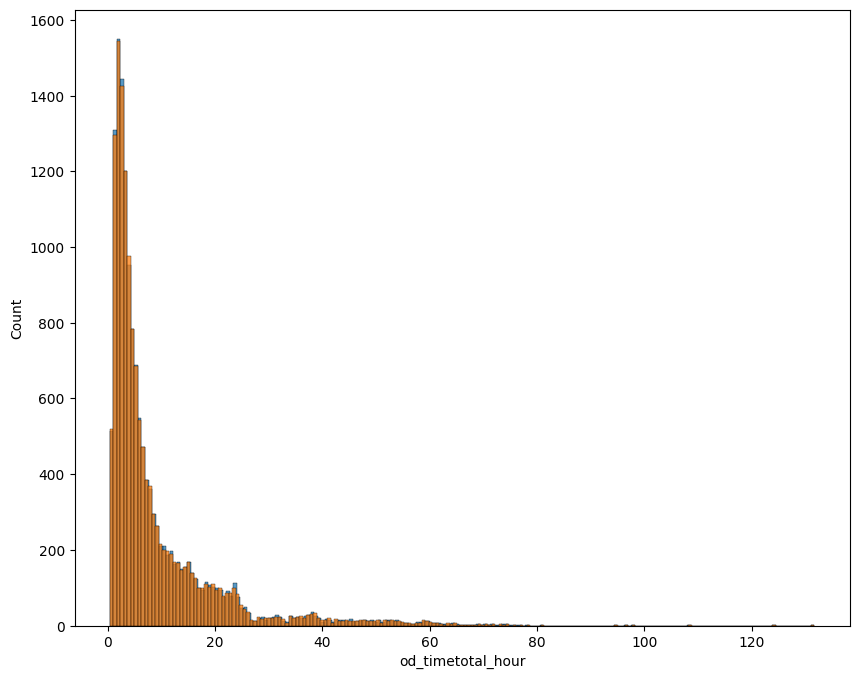

In [653]:
plt.figure(figsize=(10,8))
sns.histplot(x = "od_timetotal_hour", data = trip_data)
sns.histplot(x ="start_scan_to_end_scan_hours", data = trip_data)
plt.show()

Text(0.5, 1.0, 'Distribution check')

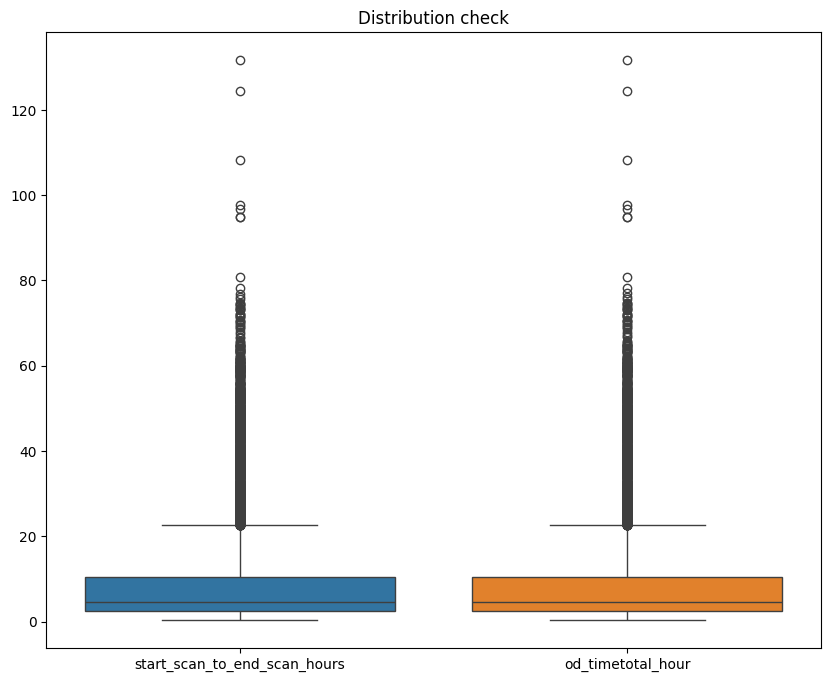

In [654]:
plt.figure(figsize=(10,8))
sns.boxplot( trip_data[["start_scan_to_end_scan_hours","od_timetotal_hour"]])
plt.title("Distribution check")

### Testing Difference Between Variances with the help of Lavene's Test

----------

Significance Level - 0.5

In [655]:
start_scant_to_end_scan_hours = trip_data["start_scan_to_end_scan_hours"]
od_timetotal_hour = trip_data["od_timetotal_hour"]

In [656]:
stats , pval = levene(start_scant_to_end_scan_hours,od_timetotal_hour)

if pval < 0.05:
  print(" Both od_timetotal_hour & start_scan_to_end_scan DON'T have  equal variance")
else:
  print("Both od_timetotal_hour & start_scan_to_end_scan  HAVE  equal variance")
print(f"Test Statistics = {stats} , pvalue = {pval}")

Both od_timetotal_hour & start_scan_to_end_scan  HAVE  equal variance
Test Statistics = 0.0030519030240502014 , pvalue = 0.9559444235657867


### Distribution Check With QQ Plot

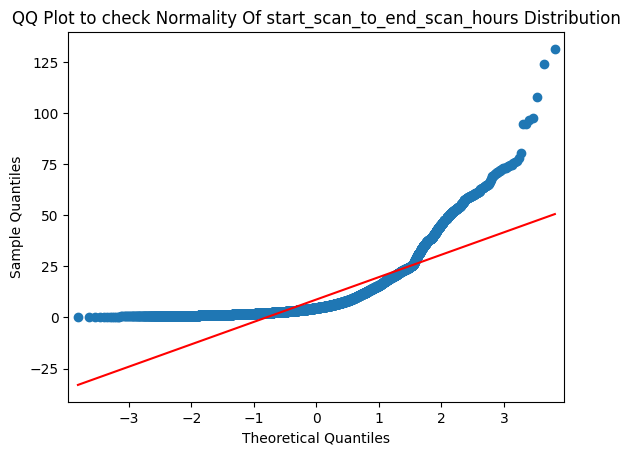

In [657]:
from statsmodels.graphics.gofplots import qqplot

qqplot(start_scant_to_end_scan_hours , line = 's')
plt.title("QQ Plot to check Normality Of start_scan_to_end_scan_hours Distribution")
plt.show()

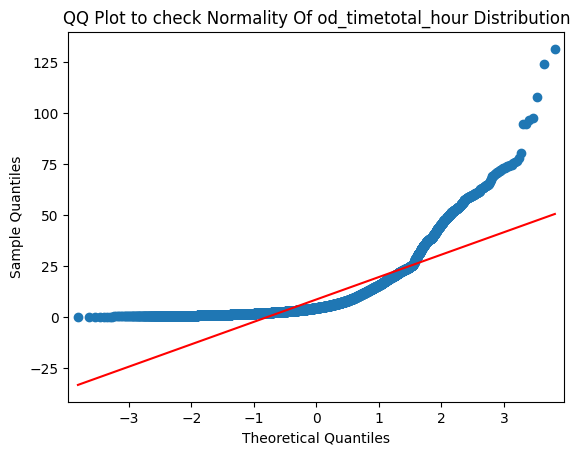

In [658]:
qqplot(od_timetotal_hour , line = 's')
plt.title("QQ Plot to check Normality Of od_timetotal_hour Distribution")
plt.show()

**Insights 🔍**

Both of the distribution doesn't follow Normal Distribution

## **Hypothesis Testing**

## Performing Kruskal-Wallis Test to check the difference between Medians
-----------
Significance level - 0.5

In [659]:
stats,pvalue = kruskal(od_timetotal_hour,start_scant_to_end_scan_hours)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Median of od_timetotal_hour is significantly different from median of start_scant_to_end_scan_hours")
else :
  print("Fail to reject Null Hypothesis :  Median of od_timetotal_hour is similar with median of start_scant_to_end_scan_hours ")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Fail to reject Null Hypothesis :  Median of od_timetotal_hour is similar with median of start_scant_to_end_scan_hours 
Test Statistics = 0.07772644614037329 , pvalue = 0.7804024351892083


### Note : Though od_timetotal_hour & start_scan_to_end_scan Not normally Distributed , Still we are going to perform Ttest.

### Performing Ttest independent
--------------

Significance level - 0.5

In [660]:
stats,pvalue = ttest_ind(od_timetotal_hour,start_scant_to_end_scan_hours)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Mean of od_timetotal_hour is significantly different from mean of start_scant_to_end_scan_hours")
else :
  print("Fail to reject Null Hypothesis :  Mean of od_timetotal_hour is similar with mean of start_scant_to_end_scan_hours ")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Fail to reject Null Hypothesis :  Mean of od_timetotal_hour is similar with mean of start_scant_to_end_scan_hours 
Test Statistics = 0.1282568191862211 , pvalue = 0.8979466082545831


#2. Analysis between actual_time aggregated value and OSRM time aggregated value



In [661]:
trip_data[["actual_time","segment_osrm_time_sum"]].describe()

,actual_time,segment_osrm_time_sum
count,14787.000000,14787.000000
mean,356.306012,180.511598
std,561.517936,314.679279
min,9.000000,6.000000
25%,67.000000,30.000000
50%,148.000000,65.000000
75%,367.000000,184.000000
max,6265.000000,2564.000000


In [662]:
actual_time = trip_data["actual_time"]
osrm_time_sum = trip_data["segment_osrm_time_sum"]

## **Visual Analysis**

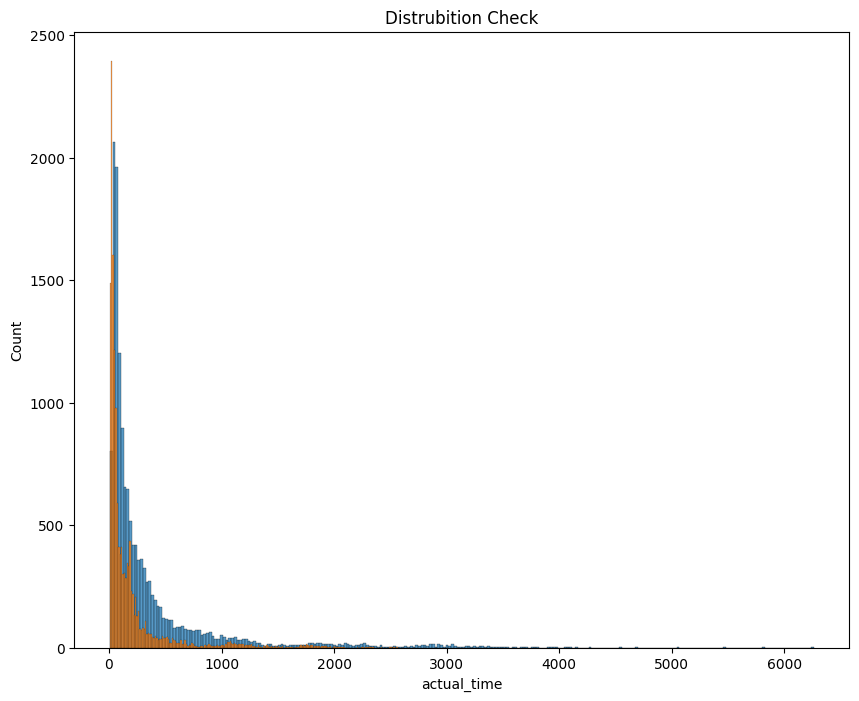

In [663]:
plt.figure(figsize=(10,8))
sns.histplot(actual_time)
sns.histplot(osrm_time_sum)
plt.title("Distrubition Check")
plt.show()

Text(0.5, 1.0, 'Distribution check')

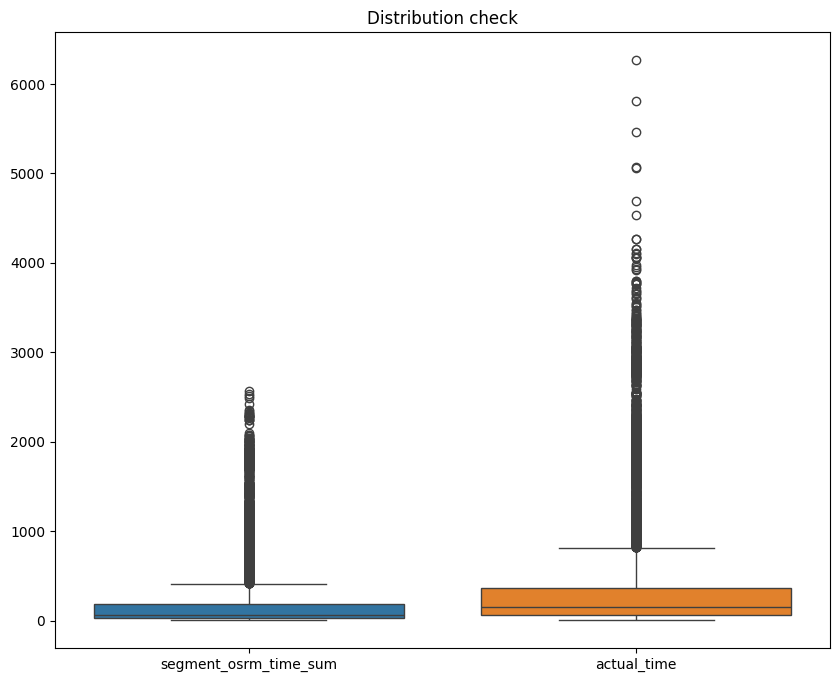

In [664]:
plt.figure(figsize=(10,8))
sns.boxplot(trip_data[["segment_osrm_time_sum","actual_time"]])
plt.title("Distribution check")

### Distribution Check With QQ Plot

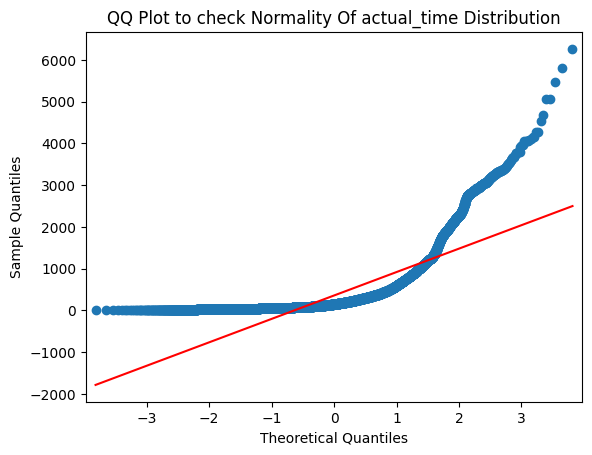

In [665]:
qqplot(actual_time , line = 's')
plt.title("QQ Plot to check Normality Of actual_time Distribution")
plt.show()

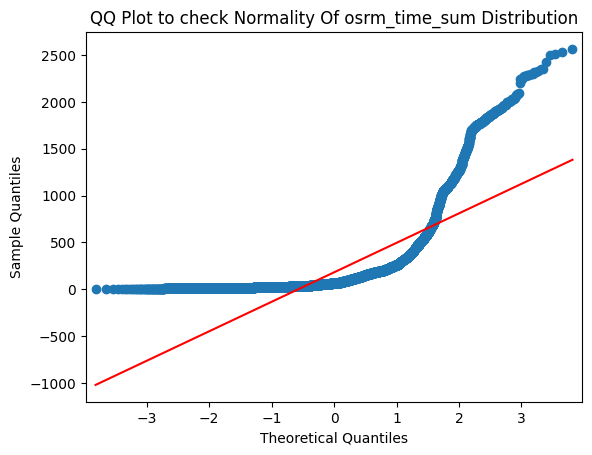

In [666]:
qqplot(osrm_time_sum , line = 's')
plt.title("QQ Plot to check Normality Of osrm_time_sum Distribution")
plt.show()

**Insights 🔍**

Both of the distribution doesn't follow Normal Distribution

## **Hypothesis Testing**

## Performing Kruskal-Wallis Test to check the difference between Medians
-----------
Significance level - 0.5

In [667]:
stats,pvalue = kruskal(actual_time,osrm_time_sum)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Median of actual_time is significantly different from median of OSRM time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Median of actual_time is similar with median of OSRM time aggregated value ")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Median of actual_time is significantly different from median of OSRM time aggregated value
Test Statistics = 2783.2889404585285 , pvalue = 0.0


### Note : Though both of the distribution does not follow normal distribution , Still we are going to perform Ttest.

### Performing Ttest independent
--------------

Significance level - 0.5

In [668]:
stats,pvalue = ttest_ind(actual_time,osrm_time_sum)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Mean of actual_time is significantly different from mean of OSRM time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Mean of actual_time is similar with mean of OSRM time aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Mean of actual_time is significantly different from mean of OSRM time aggregated value
Test Statistics = 33.21041532061086 , pvalue = 1.7694669370273323e-237


#3. Analysis between actual_time aggregated value and segment actual time aggregated value

In [669]:
trip_data[["actual_time","segment_actual_time_sum"]].describe()

,actual_time,segment_actual_time_sum
count,14787.000000,14787.000000
mean,356.306012,353.059174
std,561.517936,556.365911
min,9.000000,9.000000
25%,67.000000,66.000000
50%,148.000000,147.000000
75%,367.000000,364.000000
max,6265.000000,6230.000000


In [670]:
segment_actual_time  = trip_data["segment_actual_time_sum"]

## **Visual Analysis**

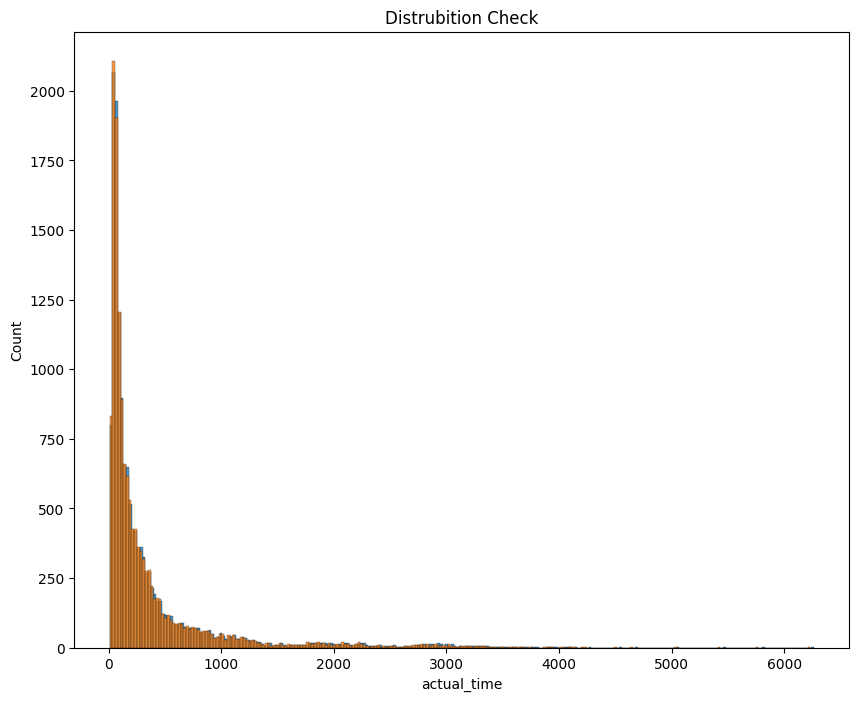

In [671]:
plt.figure(figsize=(10,8))
sns.histplot(actual_time)
sns.histplot(segment_actual_time)
plt.title("Distrubition Check")
plt.show()

Text(0.5, 1.0, 'Distribution check')

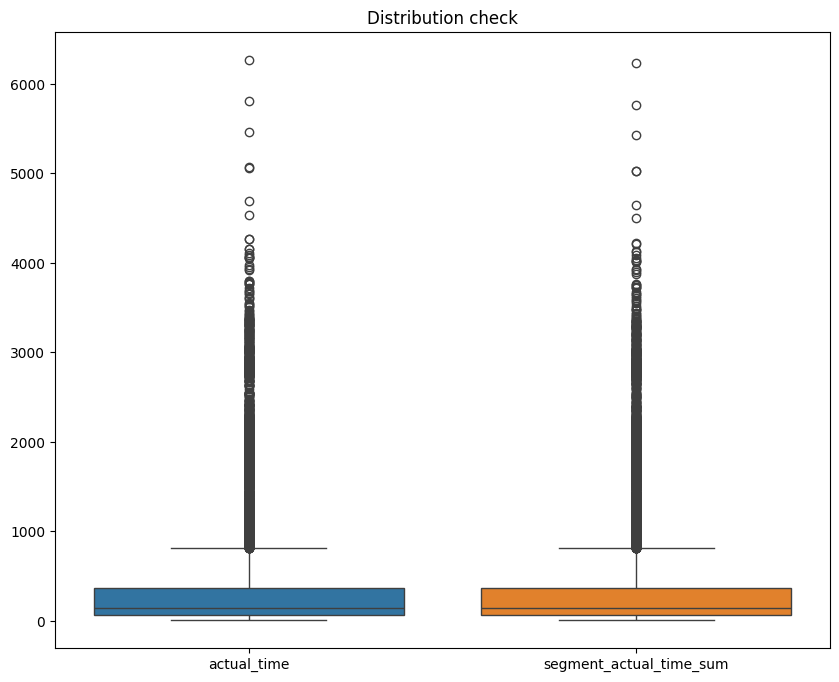

In [672]:
plt.figure(figsize=(10,8))
sns.boxplot(trip_data[["actual_time","segment_actual_time_sum"]])
plt.title("Distribution check")

## Distribution Check with QQ Plot

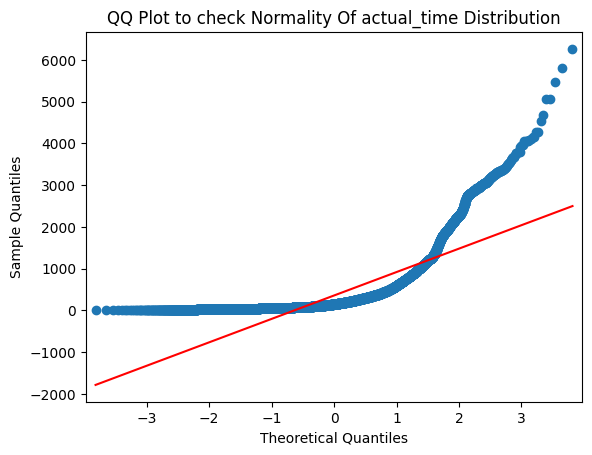

In [673]:
qqplot(actual_time , line = 's')
plt.title("QQ Plot to check Normality Of actual_time Distribution")
plt.show()

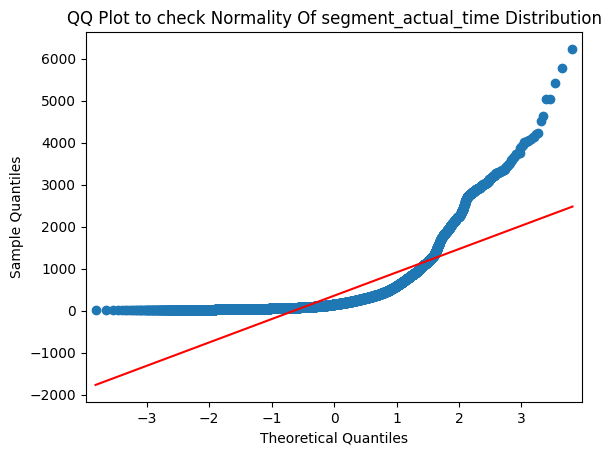

In [674]:
qqplot(segment_actual_time, line = 's')
plt.title("QQ Plot to check Normality Of segment_actual_time Distribution")
plt.show()

**Insights 🔍**

Both of the distribution doesn't follow Normal Distribution

## **Hypothesis Testing**

## Performing Kruskal-Wallis Test to check the difference between Medians
-----------
Significance level - 0.5

In [675]:
stats,pvalue = kruskal(actual_time,segment_actual_time)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Median of actual_time is significantly different from median of segment actual time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Median of actual_time is similar with median ofsegment actual time aggregated value ")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Fail to reject Null Hypothesis :  Median of actual_time is similar with median ofsegment actual time aggregated value 
Test Statistics = 0.6621963196958102 , pvalue = 0.4157856290406001


### Note : Though both of the distribution does not follow normal distribution , Still we are going to perform Ttest.

### Performing Ttest independent
--------------

Significance level - 0.5

In [676]:
stats,pvalue = ttest_ind(actual_time,segment_actual_time)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Mean of actual_time is significantly different from mean of segment actual time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Mean of actual_time is similar with mean of segment actual time aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Fail to reject Null Hypothesis :  Mean of actual_time is similar with mean of segment actual time aggregated value
Test Statistics = 0.499475764573994 , pvalue = 0.6174479719707524


#4. Analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [677]:
trip_data[["osrm_distance","segment_osrm_distance_sum"]].describe()

,osrm_distance,segment_osrm_distance_sum
count,14787.000000,14787.000000
mean,203.887411,222.705466
std,370.565564,416.846279
min,9.072900,9.072900
25%,30.756900,32.578850
50%,65.302800,69.784200
75%,206.644200,216.560600
max,2840.081000,3523.632400


In [678]:
osrm_distance = trip_data["osrm_distance"]
segment_osrm_distance = trip_data["segment_osrm_distance_sum"]

## **Visual Analysis**

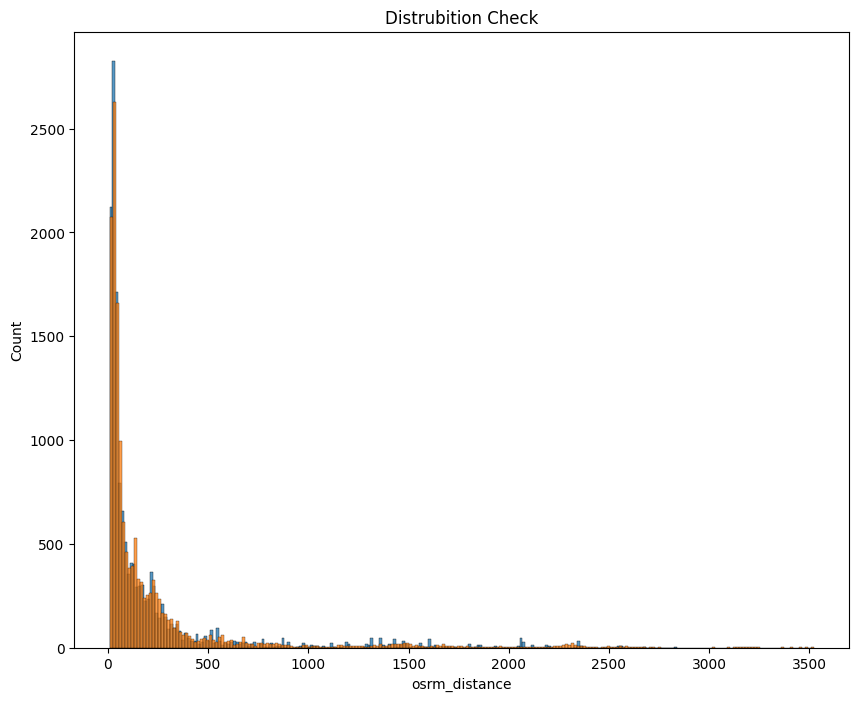

In [679]:
plt.figure(figsize=(10,8))
sns.histplot(osrm_distance)
sns.histplot(segment_osrm_distance)
plt.title("Distrubition Check")
plt.show()

Text(0.5, 1.0, 'Distribution check')

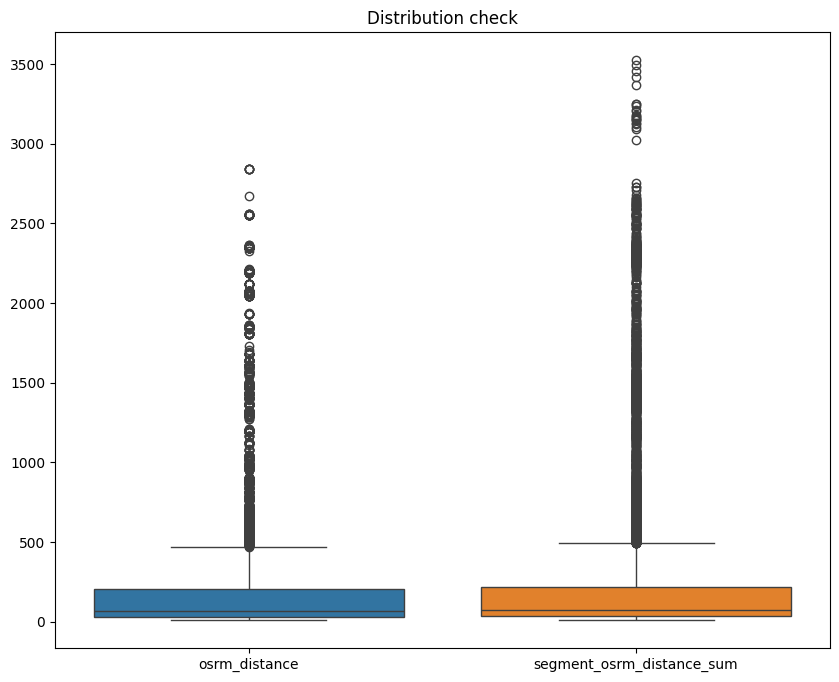

In [680]:
plt.figure(figsize=(10,8))
sns.boxplot(trip_data[["osrm_distance","segment_osrm_distance_sum"]])
plt.title("Distribution check")

## Distribution Check with QQ Plot

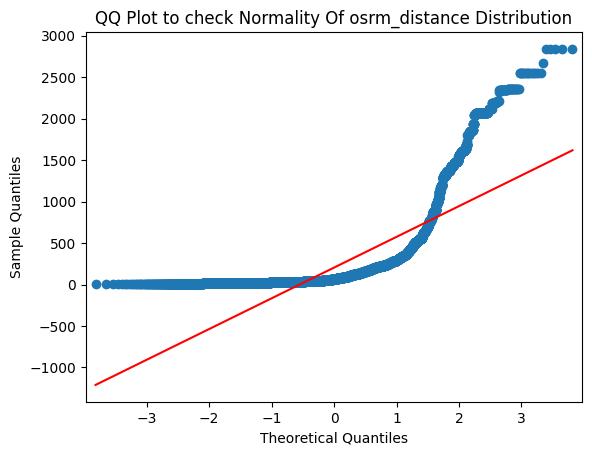

In [681]:
qqplot(osrm_distance, line = 's')
plt.title("QQ Plot to check Normality Of osrm_distance Distribution")
plt.show()

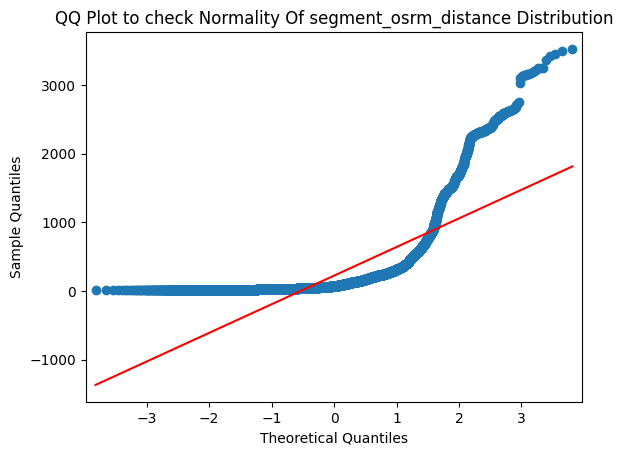

In [682]:
qqplot(segment_osrm_distance, line = 's')
plt.title("QQ Plot to check Normality Of segment_osrm_distance Distribution")
plt.show()

**Insights 🔍**

Both of the distribution doesn't follow Normal Distribution

## **Hypothesis Testing**

## Performing Kruskal-Wallis Test to check the difference between Medians
-----------
Significance level - 0.5

In [683]:
stats,pvalue = kruskal(osrm_distance,segment_osrm_distance)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Median of osrm distance aggregated value is significantly different from median of segment osrm distance aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Median of osrm distance aggregated value is similar with median of segment osrm distance aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Median of osrm distance aggregated value is significantly different from median of segment osrm distance aggregated value
Test Statistics = 23.92792425802056 , pvalue = 1.0001053043133998e-06


### Note : Though both of the distribution does not follow normal distribution , Still we are going to perform Ttest.

### Performing Ttest independent
--------------

Significance level - 0.5

In [684]:
stats,pvalue = ttest_ind(osrm_distance,segment_osrm_distance)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Mean of osrm distance aggregated value  is significantly different from mean of segment osrm distance aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Mean of osrm distance aggregated is similar with mean of segment osrm distance aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Mean of osrm distance aggregated value  is significantly different from mean of segment osrm distance aggregated value
Test Statistics = -4.102786976805513 , pvalue = 4.0929578191203324e-05


#5. Analysis between osrm time aggregated value and segment osrm time aggregated value

In [685]:
trip_data[["osrm_time","segment_osrm_time_sum"]].describe()

,osrm_time,segment_osrm_time_sum
count,14787.000000,14787.000000
mean,160.990938,180.511598
std,271.459495,314.679279
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


In [686]:
osrm_time = trip_data["osrm_time"]
segment_osrm_time = trip_data["segment_osrm_time_sum"]

## **Visual Analysis**

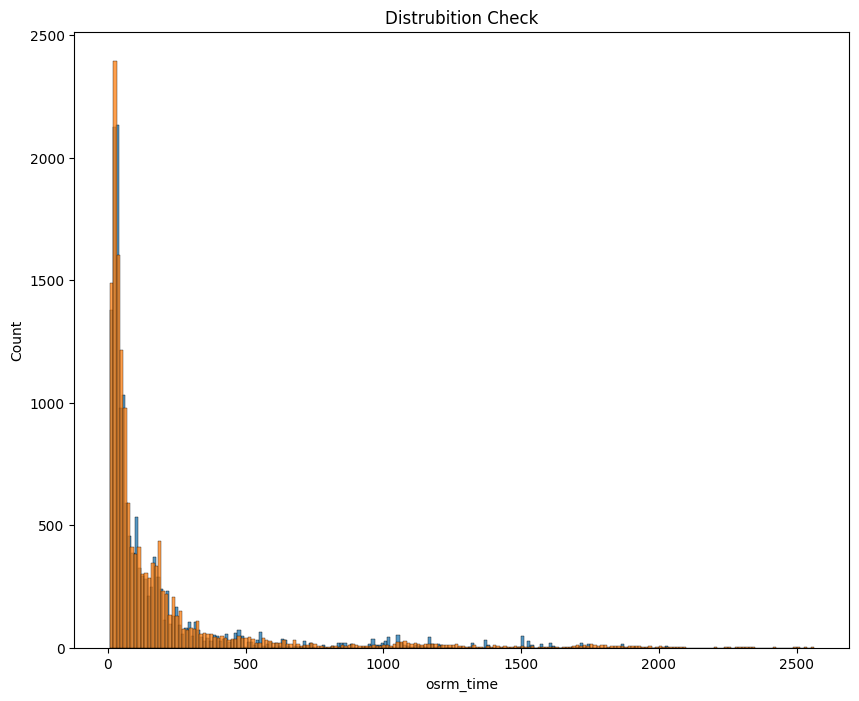

In [687]:
plt.figure(figsize=(10,8))
sns.histplot(osrm_time)
sns.histplot(segment_osrm_time)
plt.title("Distrubition Check")
plt.show()

Text(0.5, 1.0, 'Distribution check')

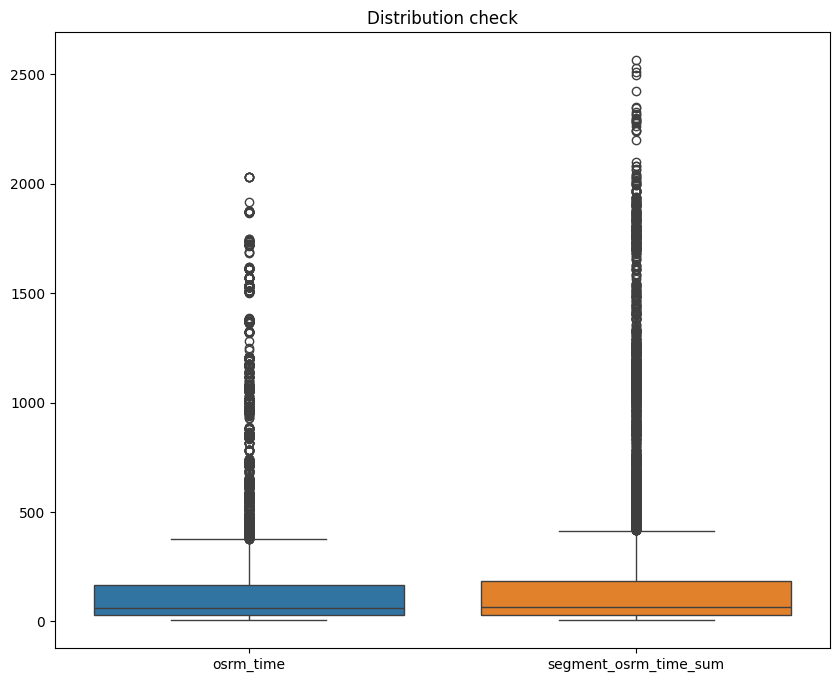

In [688]:
plt.figure(figsize=(10,8))
sns.boxplot(trip_data[["osrm_time","segment_osrm_time_sum"]])
plt.title("Distribution check")

## Distribution Check with QQ Plot

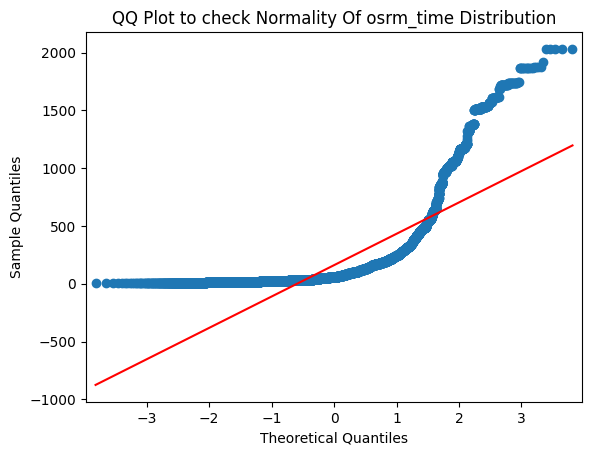

In [689]:
qqplot(osrm_time, line = 's')
plt.title("QQ Plot to check Normality Of osrm_time Distribution")
plt.show()

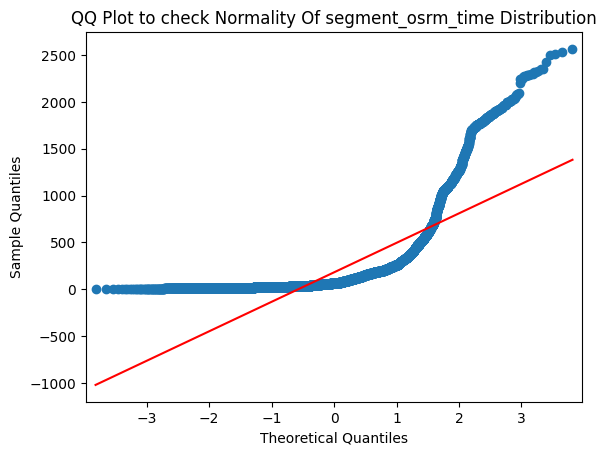

In [690]:
qqplot(segment_osrm_time, line = 's')
plt.title("QQ Plot to check Normality Of segment_osrm_time Distribution")
plt.show()

**Insights 🔍**

Both of the distribution doesn't follow Normal Distribution

## **Hypothesis Testing**

## Performing Kruskal-Wallis Test to check the difference between Medians
-----------
Significance level - 0.5

In [691]:
stats,pvalue = kruskal(osrm_time,segment_osrm_time)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Median of osrm time aggregated value is significantly different from median of segment osrm time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Median of osrm time aggregated value is similar with median of segment osrm time aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Median of osrm time aggregated value is significantly different from median of segment osrm time aggregated value
Test Statistics = 31.06964278714758 , pvalue = 2.48934342075211e-08


### Note : Though both of the distribution does not follow normal distribution , Still we are going to perform Ttest.

### Performing Ttest independent
--------------

Significance level - 0.5

In [692]:
stats,pvalue = ttest_ind(osrm_time,segment_osrm_time)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Mean of osrm time aggregated value  is significantly different from mean of segmentosrm time aggregated value")
else :
  print("Fail to reject Null Hypothesis :  Mean of osrm time aggregated value is similar with mean of segment osrm time aggregated value")

print(f"Test Statistics = {stats} , pvalue = {pvalue}")

Reject Null Hypothesis : Mean of osrm time aggregated value  is significantly different from mean of segmentosrm time aggregated value
Test Statistics = -5.711782161676085 , pvalue = 1.128703468644937e-08


_________________________________________
________________________________________
________________________________________

# Do one-hot encoding of categorical variables

In [770]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

In [771]:
encoded_data = trip_data.copy()

# **Performing One Hot Encoding**

In [772]:
cat_col = ["data","route_type"]

In [773]:
encoded_data.head(3)

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_city,source_place,source_code,source_state,trip_year,trip_month,trip_hour,trip_day,trip_weekofyear,trip_weekday,trip_day_name,start_scan_to_end_scan_hours
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,IND209304AAA,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central,6,Kanpur,Central,6,Uttar Pradesh,2018,9,0,12,37,2,Wednesday,37.65
1,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,IND561203AAB,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur,ChikaDPP,D,Karnataka,2018,9,0,12,37,2,Wednesday,3.00
2,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND000000ACB,IND000000ACB,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur,HB,Gurgaon,Bilaspur,HB,Haryana,2018,9,0,12,37,2,Wednesday,65.55


In [774]:
one_hot = OneHotEncoder(sparse = False)

In [775]:
one_hot.fit(trip_data[cat_col])

OneHotEncoder(sparse=False, sparse_output=False)

In [776]:
transformed_data = one_hot.transform(encoded_data[cat_col])

In [777]:
transformed_df = pd.DataFrame(transformed_data, columns=one_hot.get_feature_names_out(cat_col))
transformed_df.index = encoded_data.index

In [778]:
encoded_data = encoded_data.drop(columns=cat_col)

In [779]:
encoded_data = pd.concat([transformed_df,encoded_data], axis=1)

In [780]:
encoded_data.sample(10) # OneHotEncoded Data

,data_test,data_training,route_type_Carting,route_type_FTL,trip_creation_time,trip_uuid,source_center,destination_center,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_city,source_place,source_code,source_state,trip_year,trip_month,trip_hour,trip_day,trip_weekofyear,trip_weekday,trip_day_name,start_scan_to_end_scan_hours
14409,1.0,0.0,0.0,1.0,2018-10-03 11:04:40.851381,trip-153856468085110066,IND382430AAB,IND384205AAA,10.666341,639.0,82.340920,131.0,85.0,95.2082,130.0,85.0,95.2081,Gujarat,Mehsana,Panchot,IP,Ahmedabad,East,1,Gujarat,2018,10,11,3,40,2,Wednesday,10.650000
8668,0.0,1.0,0.0,1.0,2018-09-24 01:47:30.550981,trip-153775365055073872,IND570020AAA,IND571430AAA,12.315835,737.0,135.287450,499.0,180.0,173.3806,496.0,184.0,177.2062,Karnataka,Malavalli,SulthnRd,D,Mysore,Yadvgiri,IP,Karnataka,2018,9,1,24,39,0,Monday,12.283333
8995,0.0,1.0,0.0,1.0,2018-09-24 18:16:54.909822,trip-153781301490956343,IND431136AAC,IND411033AAA,10.006826,600.0,203.453397,437.0,172.0,235.6472,434.0,170.0,238.4421,Maharashtra,Pune,Tathawde,H,Aurangabad,Central,1,Maharashtra,2018,9,18,24,39,0,Monday,10.000000
10805,1.0,0.0,1.0,0.0,2018-09-27 04:18:37.965599,trip-153802191796534285,IND411033AAA,IND411021AAA,1.390930,83.0,10.583070,26.0,12.0,11.1787,25.0,16.0,14.5154,Maharashtra,PNQ,Pashan DPC,Unknown Code,Pune,Tathawde,H,Maharashtra,2018,9,4,27,39,3,Thursday,1.383333
14010,1.0,0.0,0.0,1.0,2018-10-02 20:39:14.658000,trip-153851275465767815,IND625008AAA,IND626117AAA,9.160356,547.0,166.869835,317.0,184.0,204.0035,315.0,199.0,211.3036,Tamil Nadu,Rajpalayam,AshkTalk,D,Madurai,Kappalur,H,Tamil Nadu,2018,10,20,2,40,1,Tuesday,9.116667
12587,1.0,0.0,0.0,1.0,2018-09-30 02:33:17.115026,trip-153827479711474961,IND700053AAA,IND700053AAA,22.115559,1325.0,79.762932,548.0,113.0,106.7601,548.0,113.0,106.7601,West Bengal,CCU,New Alipore,DPC,CCU,New Alipore,DPC,West Bengal,2018,9,2,30,39,6,Sunday,22.083333
3606,0.0,1.0,1.0,0.0,2018-09-16 23:55:35.631778,trip-153714213563153043,IND686507AAA,IND686513AAA,0.744934,44.0,9.070746,19.0,8.0,12.0750,19.0,8.0,12.0750,Kerala,Mundakayam,Central,1,Parakkdavu,KeRoad,D,Kerala,2018,9,23,16,37,6,Sunday,0.733333
12581,1.0,0.0,1.0,0.0,2018-09-30 02:15:31.485797,trip-153827373148555770,IND362001AAA,IND360575AAA,4.068924,244.0,85.438039,217.0,84.0,104.4631,214.0,116.0,154.0286,Gujarat,Porbandar,DC,Unknown Code,Junagadh,DPC,Unknown Code,Gujarat,2018,9,2,30,39,6,Sunday,4.066667
6110,0.0,1.0,1.0,0.0,2018-09-20 09:29:09.120247,trip-153743574911996941,IND121001AAA,IND121004AAB,0.585103,35.0,10.000411,24.0,12.0,12.1775,24.0,12.0,12.1775,Haryana,FBD,Balabhgarh,DPC,Faridabad,,Unknown Code,Haryana,2018,9,9,20,38,3,Thursday,0.583333
214,0.0,1.0,1.0,0.0,2018-09-12 05:41:23.812308,trip-153673088381201691,IND401104AAA,IND400072AAB,3.500969,210.0,16.691034,159.0,16.0,20.3115,159.0,16.0,20.3115,Maharashtra,Mumbai Hub,Hub,Unknown Code,Mumbai,MiraRd,IP,Maharashtra,2018,9,5,12,37,2,Wednesday,3.500000


# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

#**MinMaxScaler**

In [754]:
encoded_data2 = encoded_data.copy()

In [756]:
minmax = MinMaxScaler()

In [757]:
Scaled_data = minmax.fit_transform(encoded_data[num_col])

In [759]:
encoded_data2[num_col] = Scaled_data

In [789]:
encoded_data2[num_col].sample(10) #Normalized Data

,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
11480,0.050885,0.050794,0.079545,0.053389,0.077986,0.072040,0.052885,0.078577,0.077461
12161,0.000828,0.000762,0.000004,0.000799,0.001974,0.000697,0.000804,0.001564,0.000561
4283,0.026060,0.025905,0.040952,0.030531,0.045903,0.041539,0.030542,0.043002,0.035781
1574,0.226038,0.225905,0.405092,0.245684,0.356861,0.357958,0.244494,0.280297,0.294020
11470,0.009371,0.009397,0.001694,0.007992,0.005923,0.003694,0.008037,0.005082,0.002972
11191,0.040782,0.040762,0.005163,0.005275,0.006417,0.005543,0.005305,0.005864,0.005083
7338,0.057593,0.057651,0.085757,0.050352,0.080454,0.075063,0.049992,0.067631,0.061970
13825,0.019711,0.019683,0.000366,0.003676,0.006417,0.002081,0.003697,0.005864,0.002132
14651,0.172118,0.171937,0.078110,0.080563,0.113031,0.095771,0.080051,0.091087,0.087787
8718,0.016871,0.016889,0.001798,0.005435,0.005429,0.004009,0.005465,0.004300,0.003230


**🔍 Insights :**

- High Consistency in Short Trips: Normalized data for short trips shows minimal deviation between actual and predicted metrics, with values staying close to each other, indicating efficient prediction models for shorter routes.

- Larger Deviations in Longer Trips: For longer trips, the normalized data highlights significant discrepancies between actual and predicted values, suggesting room for optimization in handling extended journeys, especially in time and distance estimations.

#**StandardScaler**

In [781]:
sscaler = StandardScaler()

In [782]:
scaled_data = sscaler.fit_transform(encoded_data[num_col])

In [783]:
encoded_data[num_col] = scaled_data

In [790]:
encoded_data[num_col].sample(10) #Standardized Data

,od_timetotal_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
2727,-0.578113,-0.577955,-0.442079,-0.552639,-0.467824,-0.447932,-0.551920,-0.456072,-0.450464
3737,-0.602876,-0.602263,-0.441229,-0.515239,-0.456772,-0.447254,-0.515971,-0.408403,-0.403887
6922,0.567334,0.569056,0.239051,0.052883,0.261591,0.250711,0.052019,0.150916,0.187006
4364,-0.197286,-0.196631,-0.261560,-0.216040,-0.283628,-0.260332,-0.219394,-0.319420,-0.276574
11667,0.548379,0.544748,0.056977,0.241664,0.309482,0.128259,0.235358,0.201763,0.072443
5411,2.529012,2.531887,2.992528,2.638819,2.954534,3.019706,2.634939,2.791789,2.858513
6071,-0.213278,-0.213343,-0.208050,-0.226725,-0.243105,-0.203238,-0.228381,-0.227260,-0.222310
579,0.613980,0.613113,0.032998,0.279064,0.014769,0.063510,0.280294,0.036510,0.111614
343,0.157408,0.155828,-0.057637,0.238102,0.114235,0.067872,0.242548,0.030154,0.015191
7842,1.168235,1.167628,0.702758,1.538193,0.921012,0.985283,1.518730,0.872309,1.053318


**Insights  🔍**

- High Variation for Outliers: Some trips display extreme positive values (e.g., over 2 standard deviations above the mean), indicating significantly longer actual times and distances than predicted, suggesting outliers or unusually lengthy trips.

- Negative Standardized Values Indicate Shorter Trips: Several negative standardized values reflect trips where the actual time and distance were consistently lower than expected, hinting at either shorter routes or more efficient deliveries for these cases.

______________________________________
______________________________________

# **🔍 Combined Insights & Recommendations**
1. Route Type Efficiency – Carting vs. FTL:

  - Carting routes dominate the trips, yet they show higher inefficiencies in terms of travel time and distance compared to FTL routes, which are fewer but more efficient.
  - Recommendation: Shifting more shipments to FTL routes when possible can optimize both cost and time, especially for longer distances.
2. Impact of Key Centers:

  - The central hub, frequently used as both a source and destination, shows signs of congestion, which could be contributing to delays in travel time and completion.
  - Recommendation: Rethink routing through this hub by either staggering dispatch times or diverting some traffic to alternative centers to improve overall efficiency.
3. Time of Day & Trip Duration:

  - Early morning trips tend to be more efficient, with shorter travel durations, while trips initiated around mid-day tend to encounter more delays.
  - Recommendation: Reschedule trips to maximize early morning and night shifts, reducing delays caused by mid-day congestion, especially for time-sensitive deliveries.
4. Geographic Focus – State-Level Patterns:

  - Regions like Maharashtra and Bengaluru consistently show higher traffic and inefficiency, indicating potential bottlenecks.
  - Recommendation: Introduce region-specific strategies, such as traffic monitoring and predictive models, to improve routing and delivery speed in these areas.
5. Day of the Week Trends:

  - Wednesdays are particularly busy, leading to a drop in efficiency. Spreading the workload more evenly throughout the week could help smooth operations.
  - Recommendation: Shift some mid-week trips to lighter days like Tuesday or Thursday to balance out the workload and avoid bottlenecks.
6. Deviation from Predictions:

  - Significant differences between predicted and actual travel times suggest inefficiencies in the routing system's accuracy.
  - Recommendation: Update the routing models with more real-world data, like traffic and road conditions, to better align predicted times with actual outcomes.
7. Standardization of Trip Durations:

  - Trip durations show considerable variability, leading to unpredictable delivery times, particularly on longer routes.
  - Recommendation: Focus on reducing this variability by employing better route optimization and dynamic traffic re-routing to make delivery times more consistent.


**These insights suggest that optimizing routing, rethinking traffic-heavy areas, and adjusting scheduling patterns could significantly reduce delivery inefficiencies and improve overall performance.**